In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve
import pickle
import metrics
filename = 'LR_model.sav'
with open('.env') as f:
    _data_pth_ = f.readline().strip()
    _data_pth_ = os.path.expanduser(_data_pth_)

### load data

In [27]:
data = pd.read_csv(f'{_data_pth_}/processed/train_transaction.csv', index_col=0)

### Regression

In [28]:
y, X = data['isFraud'], data.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
_lr = LR(penalty='l1', solver='saga') # use LASSO to filter features 
model = _lr.fit(X_train, y_train)

## Export model

In [6]:
# save the model to disk
pickle.dump(model, open(filename, 'wb'))

## Load model

In [29]:

# Load the Model back from file
with open(filename, 'rb') as file:  
    model = pickle.load(file)

model

LogisticRegression(penalty='l1', solver='saga')

### Test

In [30]:
sc_train = model.score(X_train, y_train)
print(sc_train)
sc_test = model.score(X_test, y_test)
y_pred_test = model.predict(X_test)
probs_LR=model.predict_proba(X_test)
print(sc_test)

0.9721756756415214
0.9721365565299493


## Metrics

In [33]:
metrics.conf_matrix(y_test,y_pred_test)

AttributeError: module 'metrics' has no attribute 'conf_matrix'

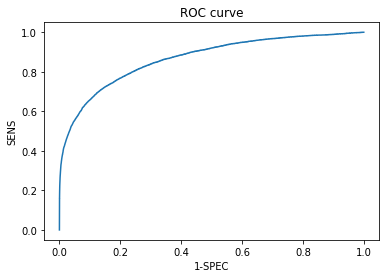

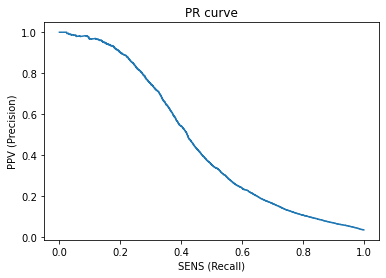

In [32]:
metrics.roc_pr_curve(y_test,probs_LR)

### dumb classifier test

In [ ]:
y, X = data['isFraud'], data.drop(columns=['isFraud'])
y[5:10] = 1
model = _lr.fit(X[:10], y[:10])
sc_dumb = model.score(X_test, y_test)
print(sc_dumb)